# Comenzando zona de pruebas de litodensidad

#### Datos

In [34]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#datos
datos = pd.read_csv('eval_petro.csv')

M = np.array( 0.01 * (189-datos['DT'])/(datos['RHOB'] - 1) )
N = np.array( (1 - datos['NPHI']) / (datos['RHOB'] - 1) )
L = np.array( 0.01 * (189 - datos['DT'])/(1 - datos['NPHI']) )
datos['M'] = np.around(M, decimals = 4)
datos['N'] = np.around(N, decimals = 4)
datos['L'] = np.around(L, decimals = 4)

PROF = np.array(datos['PROF'])
GR   = np.array(datos['GR'])
LLS  = np.array(datos['LLS'])
LLD  = np.array(datos['LLD'])
FR   = np.array(datos['FR'])
DT   = np.array(datos['DT'])
NPHI = np.array(datos['NPHI'])
RHOB = np.array(datos['RHOB'])
datos.head()

,PROF,LLD,LLS,FR,DT,NPHI,RHOB,GR,M,N,L
0,4250.000,8.5837,8.5442,10.9761,61.0312,0.0778,2.5544,24.5296,0.8233,0.5933,1.3876
1,4250.125,8.4132,8.2456,9.9042,63.4562,0.0786,2.5434,23.9439,0.8134,0.5970,1.3625
2,4250.250,8.3945,8.4990,14.9111,63.7125,0.0788,2.5461,22.4420,0.8103,0.5958,1.3600
3,4250.375,8.8741,9.0300,49.8524,62.4437,0.0745,2.5580,23.6371,0.8123,0.5940,1.3674
4,4250.500,8.6949,8.8921,27.9136,61.6875,0.0718,2.5633,24.9635,0.8144,0.5937,1.3716


In [2]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#datos
datos = pd.read_csv('eval_petro(pasado).csv')
datos['DT'] = np.around(np.array( 189 - (datos['RHOB'] -1)*datos['M']/0.01 ),   decimals =4)
datos['N']  = np.around(np.array( (1 - datos['NPHI']) / (datos['RHOB'] - 1)),   decimals = 4)
datos['L']  = np.around(np.array( 0.01 * (189-datos['DT']) / (1-datos['NPHI']) ), decimals =4)
M = np.array(datos['M'])
N = np.array(datos['N'])
L = np.array(datos['L'])

#### Delimitación de la figura

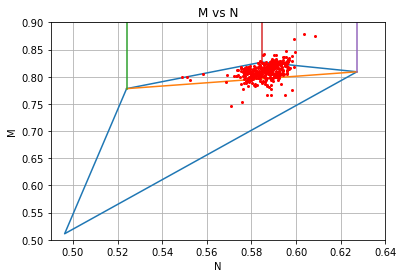

In [2]:
DOLOMIA = np.array([43.5, 0.02, 2.87])
CALIZA  = np.array([47.6, 0.00, 2.71])
SILICE  = np.array([55.5,-0.035, 2.65])
ARCILLA = np.array([120,  0.33,  2.35])

def param_lito(mineral):
    M = 0.01 * (189-mineral[0])/(mineral[2] - 1)
    N = (1 - mineral[1]) / (mineral[2] - 1)
    L = 0.01 * (189 - mineral[0])/(1 - mineral[1])
    return    np.array([M,N,L])

param_lito(DOLOMIA)
param_lito(CALIZA)
param_lito(SILICE)
param_lito(ARCILLA)

ax = param_lito(DOLOMIA)[1]
ay = param_lito(DOLOMIA)[0]
bx = param_lito(CALIZA)[1]
by = param_lito(CALIZA)[0]
cx = param_lito(SILICE)[1]
cy = param_lito(SILICE)[0]
dx = param_lito(ARCILLA)[1]
dy = param_lito(ARCILLA)[0]

P_inicial=[ax,bx,cx,dx,ax]
P_final  =[ay,by,cy,dy,ay]
P_M1=[ax,cx]
P_M2=[ay,cy]
v_x1=[ax,ax]
v_y1=[ay,1.2]
v_x2=[bx,bx]
v_y2=[by,1.2]
v_x3=[cx,cx]
v_y3=[cy,1.2]

#figura
plt.plot(P_inicial,P_final,P_M1,P_M2,v_x1,v_y1,v_x2,v_y2,v_x3,v_y3)
plt.plot(datos['N'],datos['M'],marker='o', markersize=2, linestyle='', color='r', label = "M vs N")
#plt.scatter(datos['N'],datos['M'])
plt.xlim([0.49,0.64])
plt.ylim([0.5,0.9])
#plt.xlim([0.3,1])
#plt.ylim([0.4,1.2])
plt.grid()
plt.xlabel('N')
plt.ylabel('M')
plt.title('M vs N')
plt.show()

#### Polígono de decisiones 

In [3]:
#librerias para trabajar con el poligono
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

#vertices del poligono
r1 = DOL_CAL_SIL_FIP = Polygon([(ax, ay), (bx , by), (cx , cy), (ax, ay)])
r2 = DOL_SIL_ARC_FIP = Polygon([(ax, ay), (cx , cy), (dx , dy), (ax, ay)])
r3 = DOL_CAL_FIP_FIS = Polygon([(ax, ay), (bx , by), (bx , 1.2), (ax, 1.2), (ax ,ay)])
r4 = CAL_SIL_FIP_FIS = Polygon([(bx, by), (cx , cy), (cx , 1.2), (bx ,1.2), (bx, by)])


"""definicion de los datos, conversion de datos de serie a numericos tipo array"""
#M = np.array(datos['M'])
#N = np.array(datos['N'])

#algoritmo para decidir si un punto esta dentro del poligono
i = 0
puntos = []

for numero in M:
    point = Point(N[i],M[i])
    buleano = DOL_CAL_SIL_FIP.contains(point)

    if buleano == True:
        puntos.append('DOL_CAL_SIL_FIP')

    else:
        buleano = DOL_SIL_ARC_FIP.contains(point)
        if buleano == True:
            puntos.append('DOL_SIL_ARC_FIP')

        else:
            buleano = DOL_CAL_FIP_FIS.contains(point)
            if buleano == True:
                puntos.append('DOL_CAL_FIP_FIS')

            else:
                buleano = CAL_SIL_FIP_FIS.contains(point)
                if buleano == True:
                    puntos.append('CAL_SIL_FIP_FIS')

                else:
                    puntos.append('null')
    i += 1


#no recuerdo por que meti denuevo los datos ¿¿?¿?¿'¿¿'??? xdxdxd
datos['Porosidad'] = puntos
#datos.to_csv('eval_petro_output.csv') #ahhh era para sacar un excel diferente


#### Manipulación de datos como arreglos

In [4]:
PROF = np.array(datos['PROF'])
GR   = np.array(datos['GR'])
LLS  = np.array(datos['LLS'])
FR   = np.array(datos['FR'])
DT   = np.array(datos['DT'])
NPHI = np.array(datos['NPHI'])
RHOB = np.array(datos['RHOB'])

Porosidad = np.array(datos['Porosidad'])
#print(datos)
datos.head()

,PROF,LLD,LLS,FR,DT,NPHI,RHOB,GR,M,N,L,Porosidad
0,4250.000,8.5837,8.5442,10.9761,61.0312,0.0778,2.5544,24.5296,0.8233,0.5933,1.3876,DOL_CAL_SIL_FIP
1,4250.125,8.4132,8.2456,9.9042,63.4562,0.0786,2.5434,23.9439,0.8134,0.5970,1.3625,DOL_CAL_SIL_FIP
2,4250.250,8.3945,8.4990,14.9111,63.7125,0.0788,2.5461,22.4420,0.8103,0.5958,1.3600,DOL_CAL_SIL_FIP
3,4250.375,8.8741,9.0300,49.8524,62.4437,0.0745,2.5580,23.6371,0.8123,0.5940,1.3674,DOL_CAL_SIL_FIP
4,4250.500,8.6949,8.8921,27.9136,61.6875,0.0718,2.5633,24.9635,0.8144,0.5937,1.3716,DOL_CAL_SIL_FIP


#### Armar el sistema de ecuaciones y resolverlo

In [5]:
r1 = str("DOL_CAL_SIL_FIP")
r2 = str("DOL_SIL_ARC_FIP")
r3 = str("DOL_CAL_FIP_FIS")
r4 = str("CAL_SIL_FIP_FIS")




FIP  = np.array([])
VDOL = np.array([])
VCAL = np.array([])
VSIL = np.array([])
VARC = np.array([])
FIS  = np.array([])


for area in Porosidad:

    i = 0
    if area == r1:
        A = np.array([ [189, 43.5, 47.5,   55.5],
                        [1.0, 0.02, 0.0, -0.035],
                        [1.0, 2.87, 2.71,   2.65],
                        [1.0, 1.0,  1.0,    1.0]    ])
        A.shape
        #define matrix B
        b = np.array([ DT[i],
                        NPHI[i],
                        RHOB[i],
                        1 ])
        X    = np.linalg.solve(A, b)
        FIP  = np.append(FIP, [X[0]], axis=0)
        VDOL = np.append(VDOL,[X[1]], axis=0)
        VSIL = np.append(VSIL,[X[3]], axis=0)
        VARC = np.append(VARC,[0],    axis=0)
        VCAL = np.append(VCAL,[X[2]], axis=0)
        FIS  = np.append(FIS, [0],    axis=0)



    else:
        if area == r2:
            A = np.array([ [189, 43.5, 55.5,   120],
                            [1.0, 0.02, -0.035, 0.33],
                            [1.0, 2.87, 2.65,   2.35],
                            [1.0, 1.0,  1.0,    1.0]    ])
            A.shape
            #define matrix B
            b = np.array([ DT[i],
                            NPHI[i],
                            RHOB[i],
                            1 ])
            X    = np.linalg.solve(A, b)
            FIP  = np.append(FIP, [X[0]], axis=0)
            VDOL = np.append(VDOL,[X[1]], axis=0)
            VSIL = np.append(VSIL,[X[2]], axis=0)
            VARC = np.append(VARC,[X[3]], axis=0)
            VCAL = np.append(VCAL,[0],    axis=0)
            FIS  = np.append(FIS, [0],    axis=0)



        else:
            if area == r3:
                A = np.matrix([ [189, 45.55, 43.5, 47.6],
                                [1.0, 1.0, 0.02,    0.0],
                                [1.0, 1.0, 2.87,   2.71],
                                [1.0, 1.0,  1.0,    1.0]    ])
                A.shape
                #define matrix B
                b = np.array([ DT[i],
                                NPHI[i],
                                RHOB[i],
                                1 ])
                X    = np.linalg.solve(A, b)
                FIP  = np.append(FIP, [X[0]], axis=0)
                VDOL = np.append(VDOL,[X[2]], axis=0)
                VSIL = np.append(VSIL,[0],    axis=0)
                VARC = np.append(VARC,[0],    axis=0)
                VCAL = np.append(VCAL,[X[3]], axis=0)
                FIS  = np.append(FIS, [X[1]], axis=0)



            else:
                if area == r4:
                    A = np.array([  [189, 51.55, 47.6, 55.5],
                                    [1.0, 1.0,  0.0, -0.035],
                                    [1.0, 1.0, 2.71,   2.65],
                                    [1.0, 1.0,  1.0,    1.0]    ])
                    A.shape
                    #define matrix B
                    b = np.array([ DT[i],
                                    NPHI[i],
                                    RHOB[i],
                                    1 ])
                    X    = np.linalg.solve(A, b)
                    FIP  = np.append(FIP, [X[0]], axis=0)
                    VDOL = np.append(VDOL,[0],    axis=0)
                    VSIL = np.append(VSIL,[X[3]], axis=0)
                    VARC = np.append(VARC,[0],    axis=0)
                    VCAL = np.append(VCAL,[X[2]], axis=0)
                    FIS  = np.append(FIS, [X[1]], axis=0)


                else:
                    FIP  = np.append(FIP, [np.NaN], axis=0)
                    VDOL = np.append(VDOL,[np.NaN], axis=0)
                    VSIL = np.append(VSIL,[np.NaN], axis=0)
                    VARC = np.append(VARC,[np.NaN], axis=0)
                    VCAL = np.append(VCAL,[np.NaN], axis=0)
                    FIS  = np.append(FIS, [np.NaN], axis=0)
    i += 1

FIS.shape


(400,)

#### Acomodar los resultados en la tabla de datos

In [6]:
datos['VDOL'] = np.around(VDOL,decimals = 4)
datos['VCAL'] = np.around(VCAL,decimals = 4)
datos['VSIL'] = np.around(VSIL,decimals = 4)
datos['VARC'] = np.around(VARC,decimals = 4)
datos['FIP']  = np.around(FIP, decimals = 4)
datos['FIS']  = np.around(FIS, decimals = 4)
datos.head()

,PROF,LLD,LLS,FR,DT,NPHI,RHOB,GR,M,N,L,Porosidad,VDOL,VCAL,VSIL,VARC,FIP,FIS
0,4250.000,8.5837,8.5442,10.9761,61.0312,0.0778,2.5544,24.5296,0.8233,0.5933,1.3876,DOL_CAL_SIL_FIP,0.0059,0.7116,0.1979,0.0,0.0846,0.0
1,4250.125,8.4132,8.2456,9.9042,63.4562,0.0786,2.5434,23.9439,0.8134,0.5970,1.3625,DOL_CAL_SIL_FIP,0.0059,0.7116,0.1979,0.0,0.0846,0.0
2,4250.250,8.3945,8.4990,14.9111,63.7125,0.0788,2.5461,22.4420,0.8103,0.5958,1.3600,DOL_CAL_SIL_FIP,0.0059,0.7116,0.1979,0.0,0.0846,0.0
3,4250.375,8.8741,9.0300,49.8524,62.4437,0.0745,2.5580,23.6371,0.8123,0.5940,1.3674,DOL_CAL_SIL_FIP,0.0059,0.7116,0.1979,0.0,0.0846,0.0
4,4250.500,8.6949,8.8921,27.9136,61.6875,0.0718,2.5633,24.9635,0.8144,0.5937,1.3716,DOL_CAL_SIL_FIP,0.0059,0.7116,0.1979,0.0,0.0846,0.0


#### Corregir volumenes y porosidades

In [7]:
FIT = FIP + FIS
datos['FIT']  = np.around(FIT, decimals = 4)

Suma = VDOL + VCAL + VSIL + VARC + FIS + FIP
datos['Suma']  = np.around(Suma, decimals = 4)


SumaABS = abs(VDOL) + abs(VCAL) + abs(VSIL) + abs(VARC) + abs(FIS) + abs(FIP)
VDOLR = abs(VDOL)/SumaABS
VCALR = abs(VCAL)/SumaABS
VSILR = abs(VSIL)/SumaABS
VARCR = abs(VARC)/SumaABS
FIPR  = abs(FIP)/SumaABS
FISR  = abs(FIS)/SumaABS
FITR  = abs(FIT)/SumaABS


datos['VDOLR'] = np.around(VDOLR,decimals = 4)
datos['VCALR'] = np.around(VCALR,decimals = 4)
datos['VSILR'] = np.around(VSILR,decimals = 4)
datos['VARCR'] = np.around(VARCR,decimals = 4)
datos['FIPR']  = np.around(FIPR, decimals = 4)
datos['FISR']  = np.around(FISR, decimals = 4)
datos['FITR']  = np.around(FITR, decimals = 4)


SumaR = VDOLR + VCALR + VSILR + VARCR + FISR + FIPR
datos['SumaR']  = np.around(SumaR, decimals = 4)
datos.head()

,PROF,LLD,LLS,FR,DT,NPHI,RHOB,GR,M,N,...,FIT,Suma,VDOLR,VCALR,VSILR,VARCR,FIPR,FISR,FITR,SumaR
0,4250.000,8.5837,8.5442,10.9761,61.0312,0.0778,2.5544,24.5296,0.8233,0.5933,...,0.0846,1.0,0.0059,0.7116,0.1979,0.0,0.0846,0.0,0.0846,1.0
1,4250.125,8.4132,8.2456,9.9042,63.4562,0.0786,2.5434,23.9439,0.8134,0.5970,...,0.0846,1.0,0.0059,0.7116,0.1979,0.0,0.0846,0.0,0.0846,1.0
2,4250.250,8.3945,8.4990,14.9111,63.7125,0.0788,2.5461,22.4420,0.8103,0.5958,...,0.0846,1.0,0.0059,0.7116,0.1979,0.0,0.0846,0.0,0.0846,1.0
3,4250.375,8.8741,9.0300,49.8524,62.4437,0.0745,2.5580,23.6371,0.8123,0.5940,...,0.0846,1.0,0.0059,0.7116,0.1979,0.0,0.0846,0.0,0.0846,1.0
4,4250.500,8.6949,8.8921,27.9136,61.6875,0.0718,2.5633,24.9635,0.8144,0.5937,...,0.0846,1.0,0.0059,0.7116,0.1979,0.0,0.0846,0.0,0.0846,1.0


In [8]:
m   = np.log(1/FR) / np.log(FITR)
FIF = FITR**m
FIENT = FITR - FIF
datos['m']  = np.around(m, decimals = 4)
datos['FIF(%)']  = np.around(FIF*100, decimals = 4)
datos['FIENT(%)']  = np.around(FIENT*100, decimals = 4)

#datos.to_csv('eval_petro_output.csv') #exportando al archivo csv

FIEFE = FITR*(1-VARCR)
FIEFE_FIF = FIEFE / FIF
FIZ = FITR / (1-FITR)

datos['FIEFE(%)']      = np.around( FIEFE * 100, decimals =4)
datos['FIEFE_FIF']  = np.around( FIEFE_FIF, decimals =4)
datos['FIZ']        = np.around( FIZ, decimals =4)

datos.head()

,PROF,LLD,LLS,FR,DT,NPHI,RHOB,GR,M,N,...,FIPR,FISR,FITR,SumaR,m,FIF(%),FIENT(%),FIEFE(%),FIEFE_FIF,FIZ
0,4250.000,8.5837,8.5442,10.9761,61.0312,0.0778,2.5544,24.5296,0.8233,0.5933,...,0.0846,0.0,0.0846,1.0,0.9700,9.1107,-0.6500,8.4607,0.9287,0.0924
1,4250.125,8.4132,8.2456,9.9042,63.4562,0.0786,2.5434,23.9439,0.8134,0.5970,...,0.0846,0.0,0.0846,1.0,0.9284,10.0967,-1.6360,8.4607,0.8380,0.0924
2,4250.250,8.3945,8.4990,14.9111,63.7125,0.0788,2.5461,22.4420,0.8103,0.5958,...,0.0846,0.0,0.0846,1.0,1.0941,6.7064,1.7543,8.4607,1.2616,0.0924
3,4250.375,8.8741,9.0300,49.8524,62.4437,0.0745,2.5580,23.6371,0.8123,0.5940,...,0.0846,0.0,0.0846,1.0,1.5828,2.0059,6.4548,8.4607,4.2179,0.0924
4,4250.500,8.6949,8.8921,27.9136,61.6875,0.0718,2.5633,24.9635,0.8144,0.5937,...,0.0846,0.0,0.0846,1.0,1.3480,3.5825,4.8782,8.4607,2.3617,0.0924


In [9]:
datos.to_csv('eval_petro_output(pasado).csv') #ahhh era para sacar un excel diferente


In [10]:
datos.to_csv('eval_petro_output.csv') #ahhh era para sacar un excel diferente

In [11]:
i = 0
negativos = 0
for exponente in m:
    if m[i] < 1:
        negativos += 1
    i+=1
negativos

14

In [12]:
i = 0
negativos = 0
for exponente in FIENT:
    if FIENT[i] < 0:
        negativos += 1
    i+=1
negativos

14

In [13]:
negativos*100/400

3.5

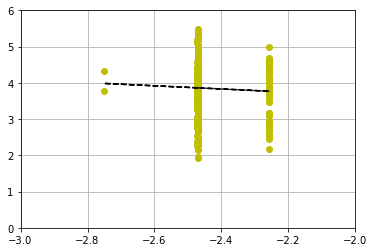

[-0.43660849  2.78316597]


In [18]:

fit = np.polyfit(np.log(FITR),np.log(FR),1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y
plt.plot(np.log(FITR),np.log(FR), 'yo', np.log(FITR), fit_fn(np.log(FITR)), '--k')
plt.xlim(-3, -2)
plt.ylim(0, 6)
plt.grid()
plt.show()
print(fit)

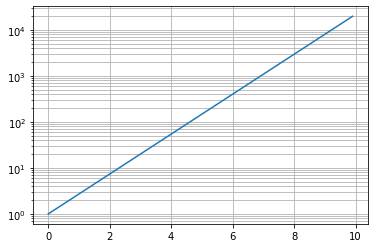

In [19]:
x = np.arange(0,10,0.1)
y = np.e **x
plt.grid(True,which="both",ls="-")
plt.plot(x,y)
plt.yscale("log")
plt.show()

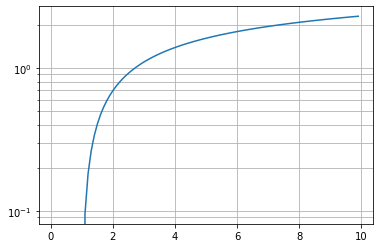

In [20]:
x = np.arange(0.1,10,0.1)
y = np.log(x)
plt.grid(True,which="both",ls="-")
plt.plot(x,y)
plt.yscale("log")
plt.show()

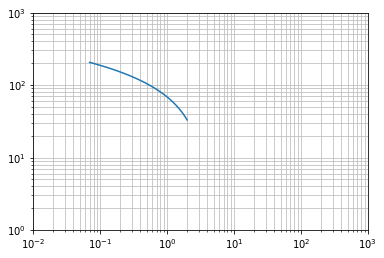

In [23]:
plt.plot(X, intercept + slope*np.log10(X))
plt.xscale("log")
plt.yscale("log")
plt.ylim(1,1000)
plt.xlim(0.01,1000)
plt.grid(True,which="both",ls="-", color='0.75')

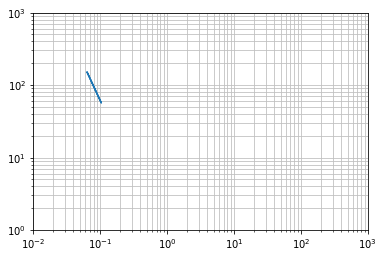

In [22]:
plt.plot(FITR,0.62*FITR**-2)
plt.xscale("log")
plt.yscale("log")
plt.ylim(1,1000)
plt.xlim(0.01,1000)
plt.grid(True,which="both",ls="-", color='0.75')

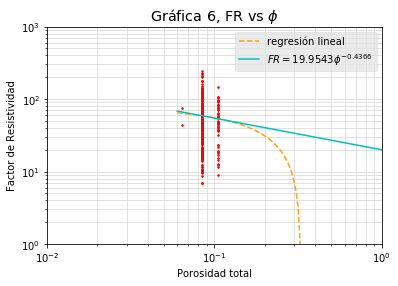

m = -0.4366084898964873
a = 19.954392076162293


In [24]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err  = linregress(FITR, FR)
X = np.linspace(0.06,1, 100)
plt.plot(X[:29], intercept + slope*X[:29],'--',  linewidth=1.5, label = 'regresión lineal', color='orange') #'g--',
plt.style.use('ggplot')
plt.plot(FITR, FR, marker = 'o', markersize = '1.5', linestyle='', color = 'r')
plt.ylim(1,1000)
plt.xlim(0.01,1)
plt.xscale("log")
plt.yscale("log")
plt.grid(True,which="both",ls="-", color='0.85')
plt.title('Gráfica 6, FR vs ' + r'$\phi$')
plt.xlabel("Porosidad total")
plt.ylabel("Factor de Resistividad")
plt.plot(X, 19.9543920761623*X**-0.4366084898964984, linewidth=1.5, label='$FR=19.9543\phi^{-0.4366}$', color='c')
plt.legend()
plt.show()

slope, intercept, r_value, p_value, std_err  = linregress(np.log10(FITR), np.log10(FR))
print("m = " + str(slope) )
a = FR * FITR ** 0.4366084898964984
a = np.mean(a)
print("a = " + str(a) )
#for style in plt.style.available:
#   print(style)


In [85]:
mpickett1 = -(np.log(FR)/np.log(FITR))
mpickett1 = np.mean(mpickett)
print(mpickett1)
mpickett2 = linregress(np.log10(LLD), np.log10(FITR))[0]
print(mpickett2)

1.5758057832856747
-0.0031068165089692687


In [ ]:
slope, intercept, r_value, p_value, std_err  = linregress(LLD,FITR)
X = np.linspace(10,1000, 100)
plt.plot(X[:], intercept + slope*X[:],'--',  linewidth=1.5, label = 'regresión lineal', color='orange') #'g--',
plt.style.use('ggplot')
plt.plot(LLD, FITR, marker = 'o', markersize = '1.5', linestyle='', color = 'r')
plt.ylim(1,1000)
plt.xlim(0.01,1)
plt.xscale("log")
plt.yscale("log")
plt.grid(True,which="both",ls="-", color='0.85')
plt.title('Gráfica 6, LLD vs ' + r'$\phi$')
plt.ylabel("Porosidad total")
plt.xlabel("LLD")
#plt.plot(X, 19.9543920761623*X**-0.4366084898964984, linewidth=1.5, label='$FR=19.9543\phi^{-0.4366}$', color='c')

plt.legend()
plt.show()


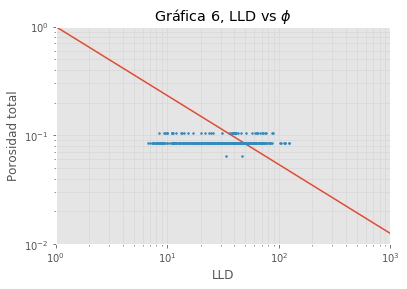

In [79]:
linea = np.linspace(0.1,1000,1000)
#plt.scatter(FR, FR**(-1/mpickett))
plt.plot(linea, 1*linea**(-1/mpickett1))
plt.style.use('ggplot')
plt.plot(LLD, FITR, marker = 'o', markersize = '1.5', linestyle='')#, color = 'r'
plt.xlim(1,1000)
plt.ylim(0.01,1)
plt.xscale("log")
plt.yscale("log")
plt.grid(True,which="both",ls="-", color='0.85')
plt.title('Gráfica 6, LLD vs ' + r'$\phi$')
plt.ylabel("Porosidad total")
plt.xlabel("LLD")
#plt.plot(X, 19.9543920761623*X**-0.4366084898964984, linewidth=1.5, label='$FR=19.9543\phi^{-0.4366}$', color='c')

#plt.legend()
plt.show()

In [73]:
RW = LLD/FR
np.mean(RW)

0.7039888812438853

In [88]:
RW = LLD*FITR**mpickett1
FRcPICKETT = 1 * FITR **(-1*mpickett1)
#FRcPICKETT